## EDA using Python Project on Sales Dataset

### Importing Data from Kaggle

In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import importlib
# From python script with functions

import sales_funcs
importlib.reload(sales_funcs)

from sales_funcs import *

In [410]:
import kagglehub

path = kagglehub.dataset_download("vinothkannaece/sales-dataset")

In [411]:
data = pd.read_csv(path + "/sales_data.csv")
data.head()

Product_ID   Sale_Date Sales_Rep Region  Sales_Amount  Quantity_Sold  \
0        1052  2023-02-03       Bob  North       5053.97             18   
1        1093  2023-04-21       Bob   West       4384.02             17   
2        1015  2023-09-21     David  South       4631.23             30   
3        1072  2023-08-24       Bob  South       2167.94             39   
4        1061  2023-03-24   Charlie   East       3750.20             13   

  Product_Category  Unit_Cost  Unit_Price Customer_Type  Discount  \
0        Furniture     152.75      267.22     Returning      0.09   
1        Furniture    3816.39     4209.44     Returning      0.11   
2             Food     261.56      371.40     Returning      0.20   
3         Clothing    4330.03     4467.75           New      0.02   
4      Electronics     637.37      692.71           New      0.08   

  Payment_Method Sales_Channel Region_and_Sales_Rep  
0           Cash        Online            North-Bob  
1           Cash        Retail             West-Bob  
2  Bank Transfer        Retail          South-David  
3    Credit Card        Retail            South-Bob  
4    Credit Card        Online         East-Charlie

In [412]:
data.describe()

Product_ID  Sales_Amount  Quantity_Sold    Unit_Cost   Unit_Price  \
count  1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean   1050.128000   5019.265230      25.355000  2475.304550  2728.440120   
std      29.573505   2846.790126      14.159006  1417.872546  1419.399839   
min    1001.000000    100.120000       1.000000    60.280000   167.120000   
25%    1024.000000   2550.297500      13.000000  1238.380000  1509.085000   
50%    1051.000000   5019.300000      25.000000  2467.235000  2696.400000   
75%    1075.000000   7507.445000      38.000000  3702.865000  3957.970000   
max    1100.000000   9989.040000      49.000000  4995.300000  5442.150000   

         Discount  
count  1000.00000  
mean      0.15239  
std       0.08720  
min       0.00000  
25%       0.08000  
50%       0.15000  
75%       0.23000  
max       0.30000

In [413]:
data.dtypes

Product_ID                int64
Sale_Date                object
Sales_Rep                object
Region                   object
Sales_Amount            float64
Quantity_Sold             int64
Product_Category         object
Unit_Cost               float64
Unit_Price              float64
Customer_Type            object
Discount                float64
Payment_Method           object
Sales_Channel            object
Region_and_Sales_Rep     object
dtype: object

In [414]:
cleaned_data = clean_data(data)
cleaned_data.head()

Product_ID Sales_Rep Region  Sales_Amount  Quantity_Sold Product_Category  \
0        1052       Bob  North       5053.97             18        Furniture   
1        1093       Bob   West       4384.02             17        Furniture   
2        1015     David  South       4631.23             30             Food   
3        1072       Bob  South       2167.94             39         Clothing   
4        1061   Charlie   East       3750.20             13      Electronics   

   Unit_Cost  Unit_Price Customer_Type  Discount Payment_Method Sales_Channel  \
0     152.75      267.22     Returning      0.09           Cash        Online   
1    3816.39     4209.44     Returning      0.11           Cash        Retail   
2     261.56      371.40     Returning      0.20  Bank Transfer        Retail   
3    4330.03     4467.75           New      0.02    Credit Card        Retail   
4     637.37      692.71           New      0.08    Credit Card        Online   

  Region_and_Sales_Rep  Year  Month  Day Day_of_Week     profit  
0            North-Bob  2023      2    3      Friday  1627.5636  
1             West-Bob  2023      4   21      Friday -1189.8028  
2          South-David  2023      9   21    Thursday  1066.8000  
3            South-Bob  2023      8   24    Thursday  1886.2350  
4         East-Charlie  2023      3   24      Friday    -0.9984

### Univariate Analysis

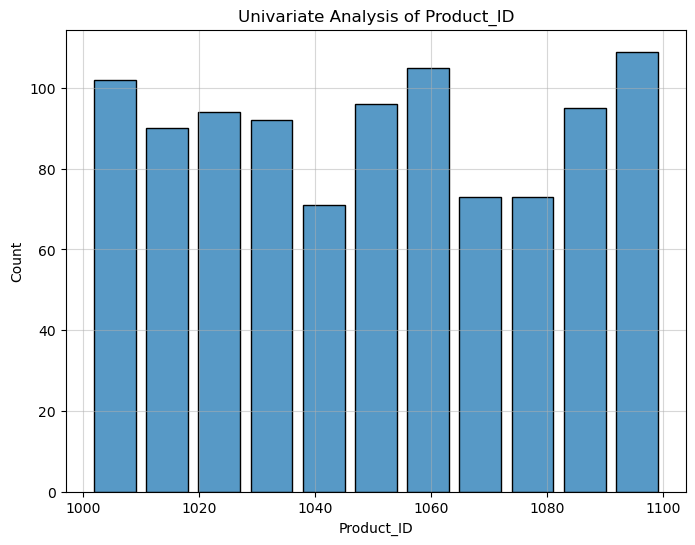

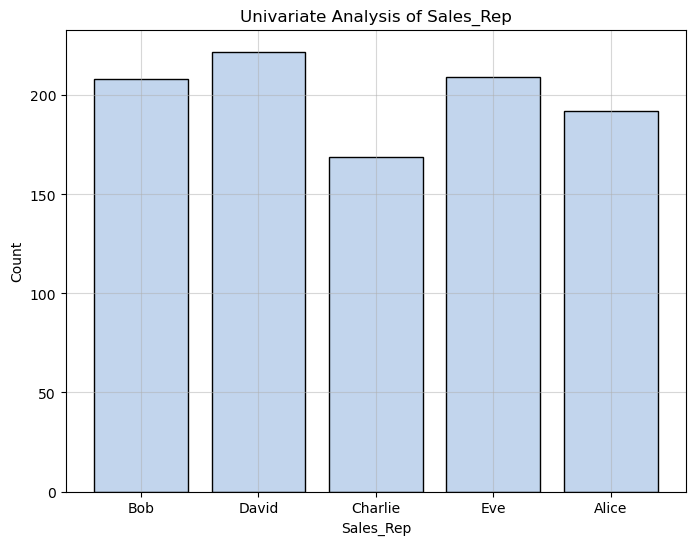

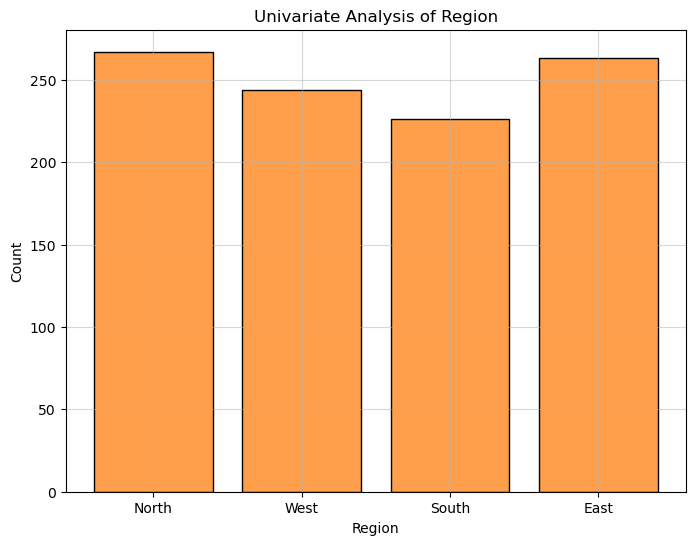

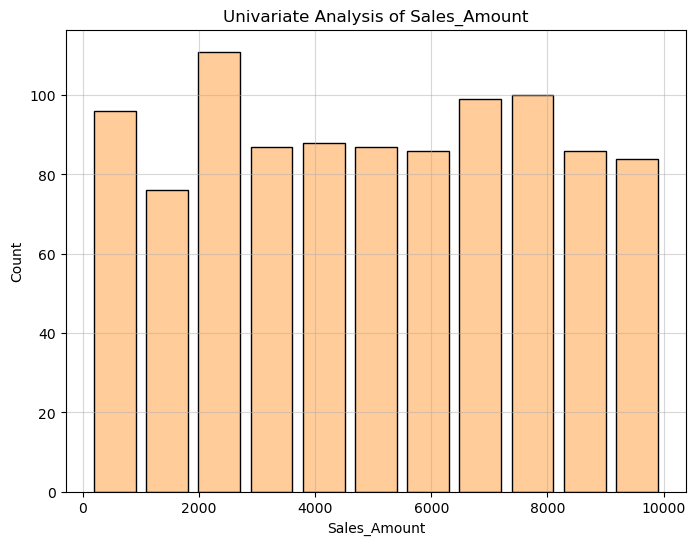

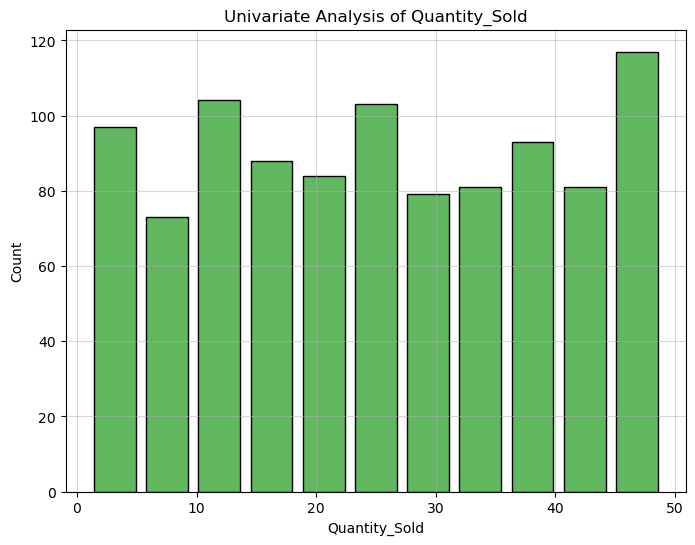

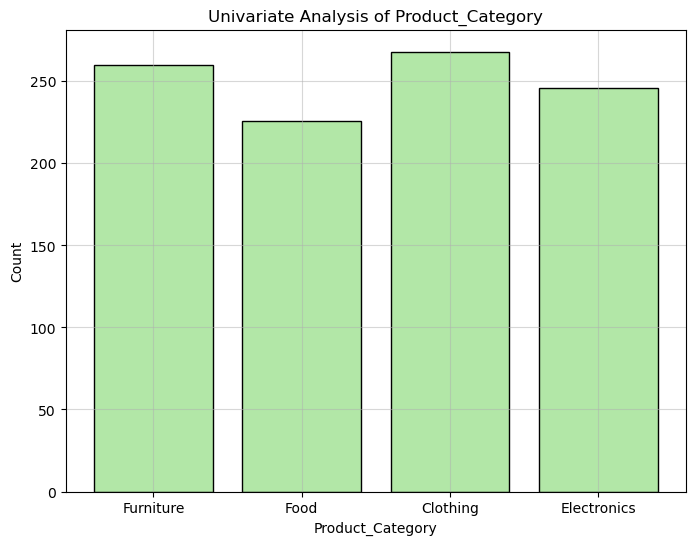

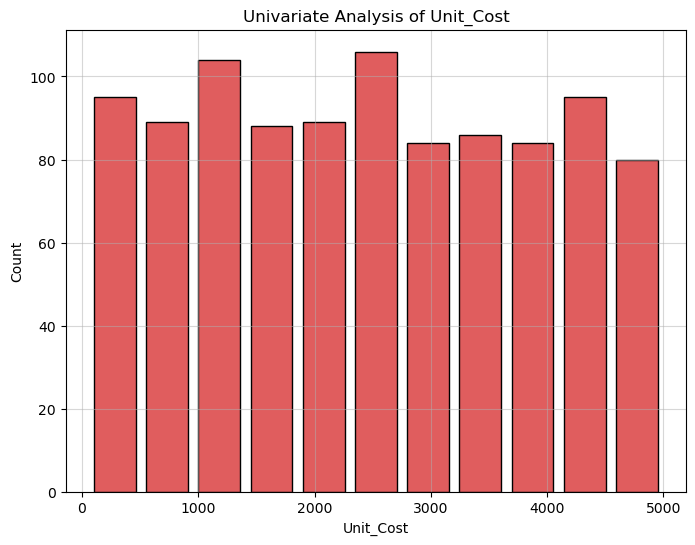

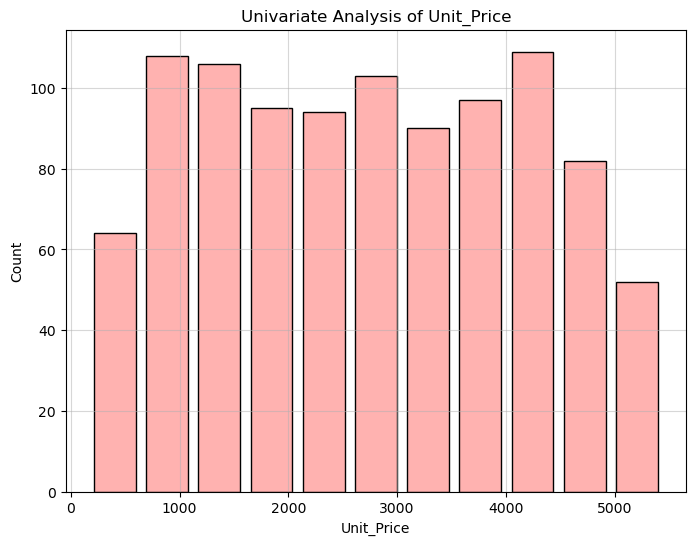

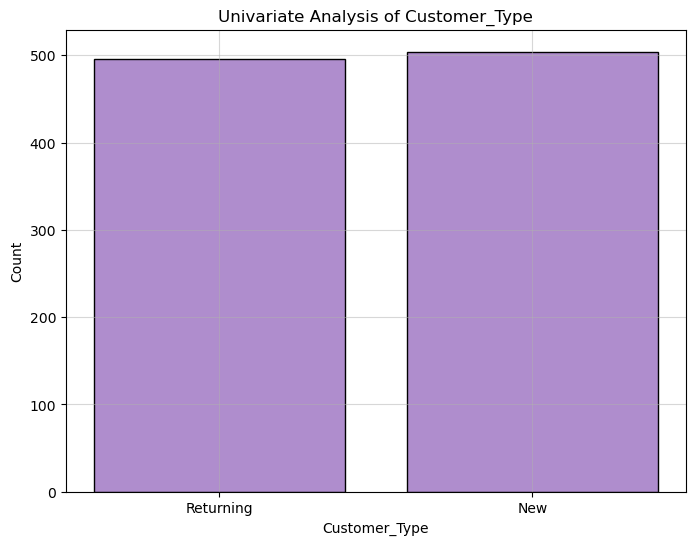

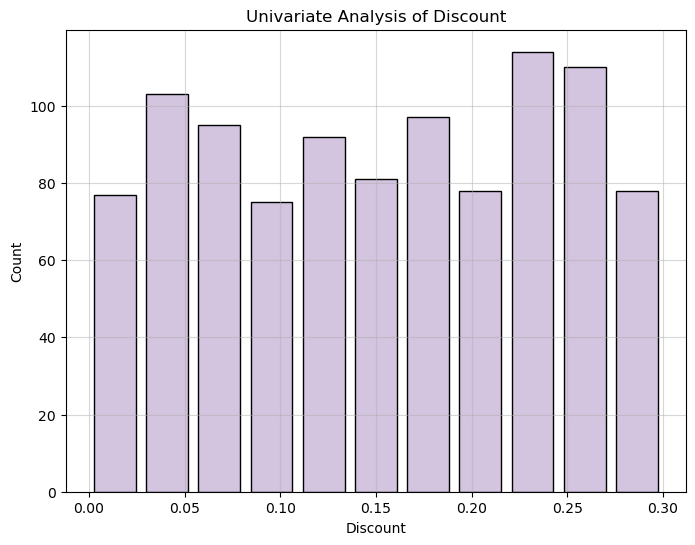

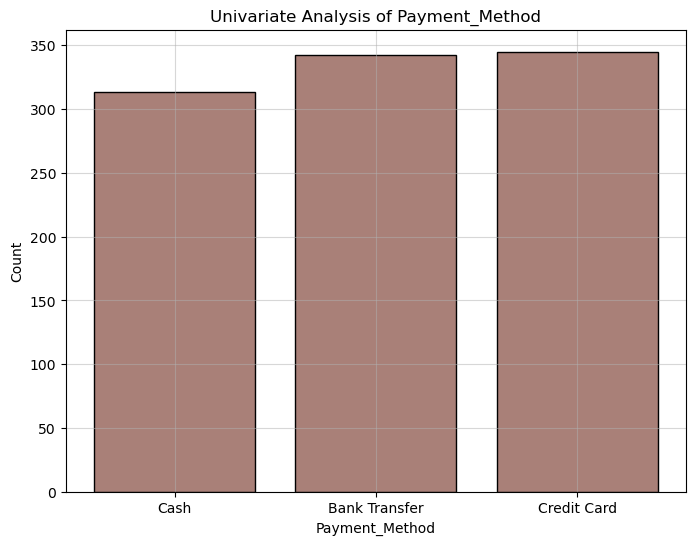

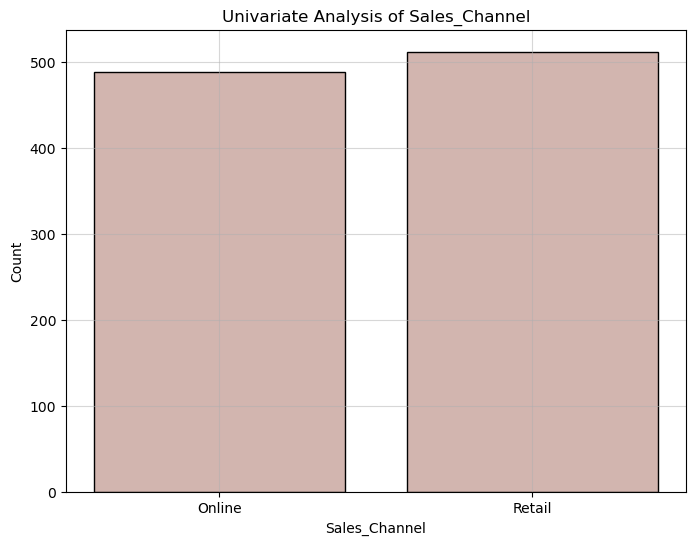

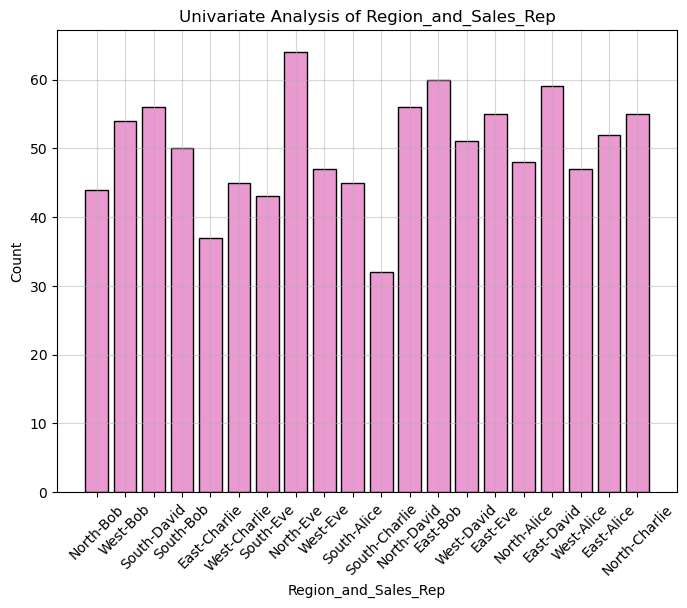

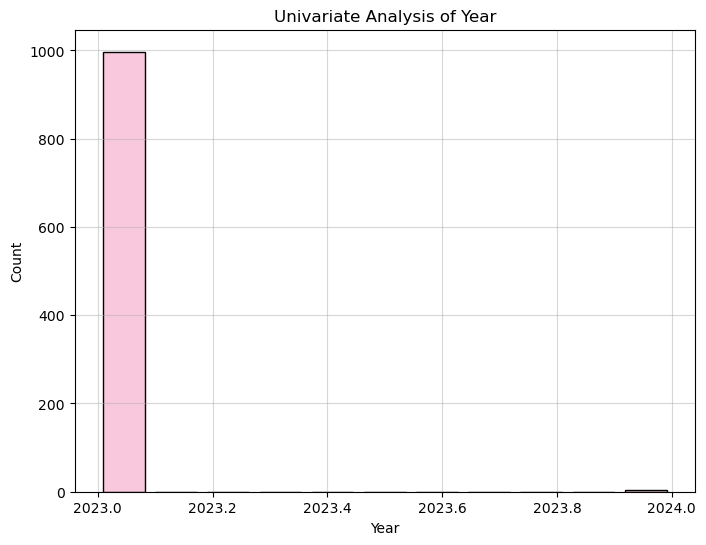

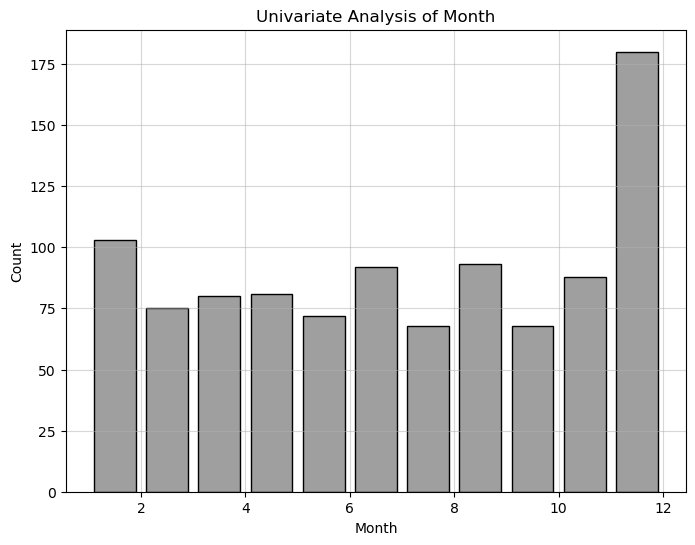

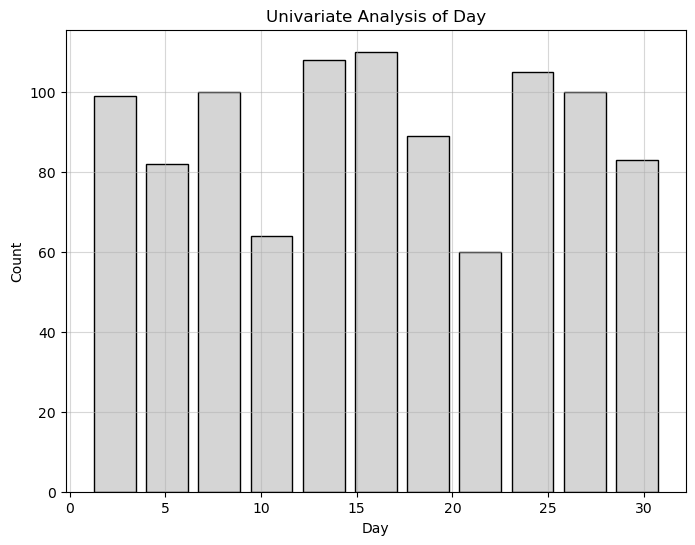

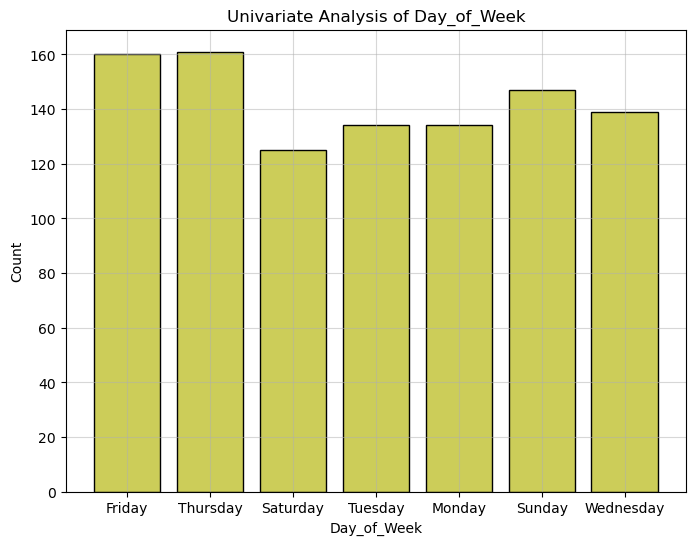

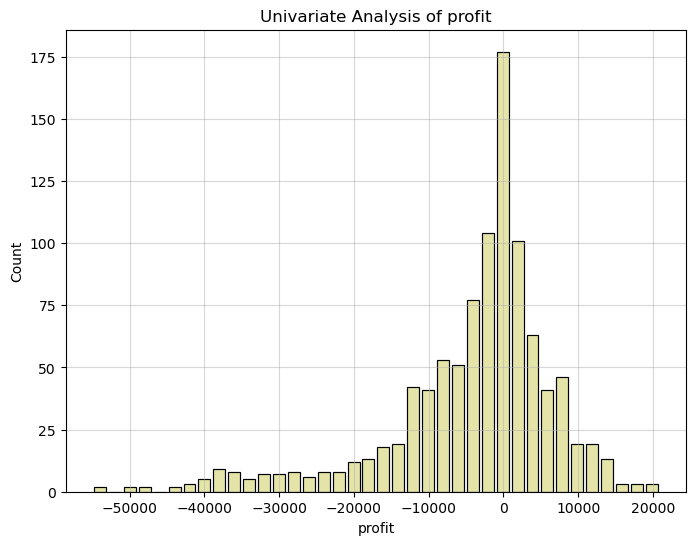

In [415]:
univariate_analysis(cleaned_data)

### Correlation Matrix & Bivariate Analysis of High Correlations

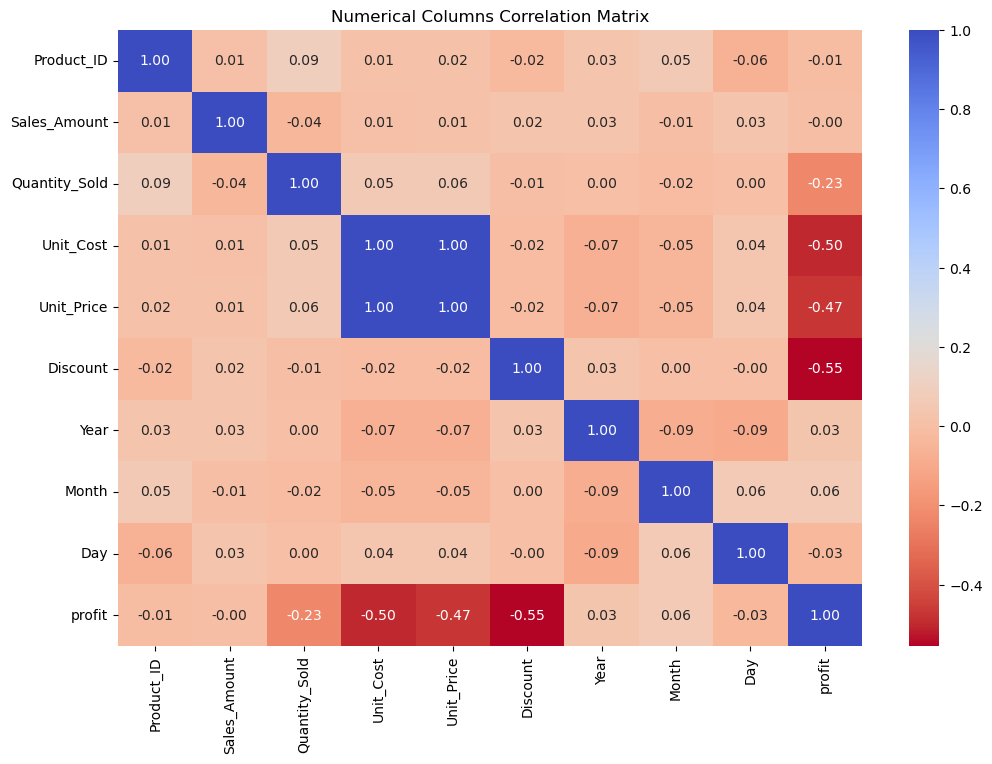

In [416]:
corr_matrix(data=cleaned_data)

#### Using Categorical Values as the Hue

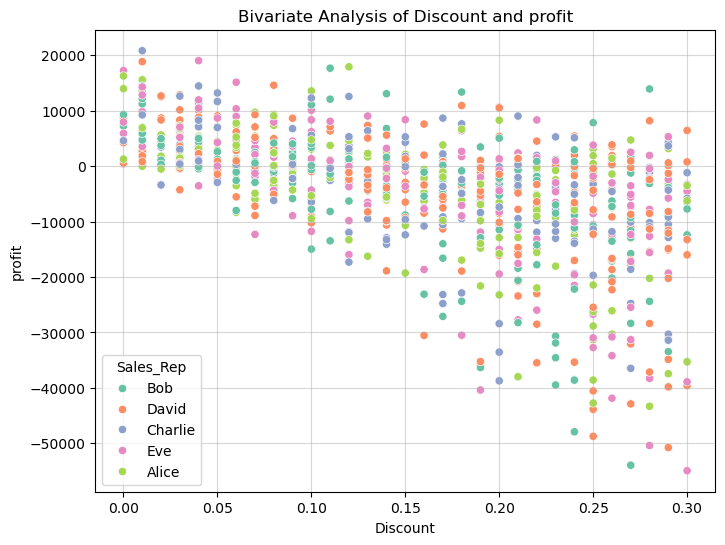

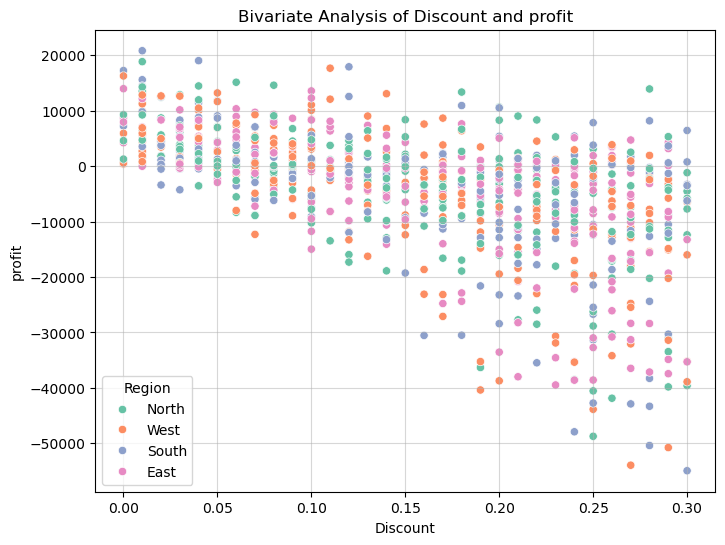

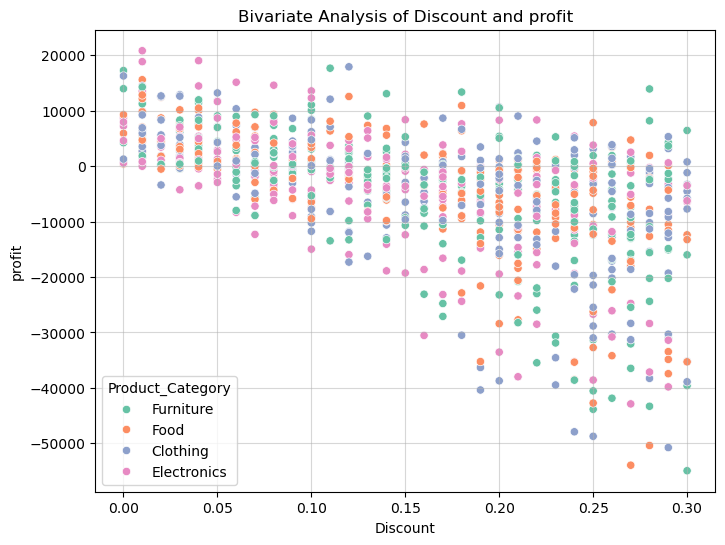

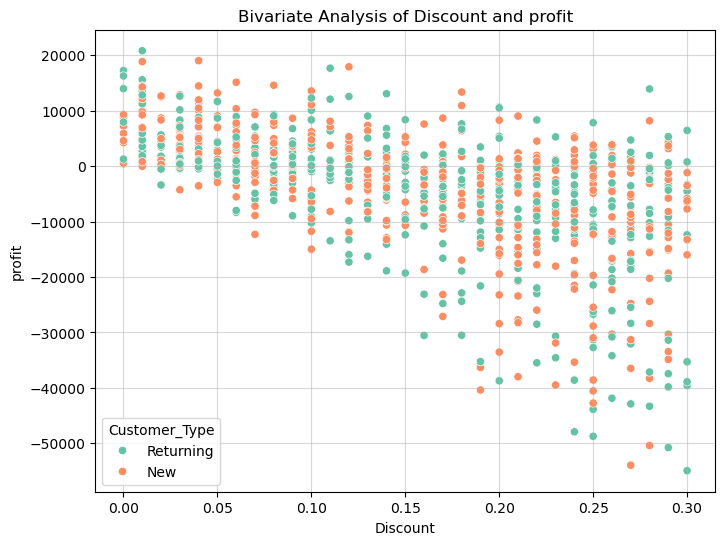

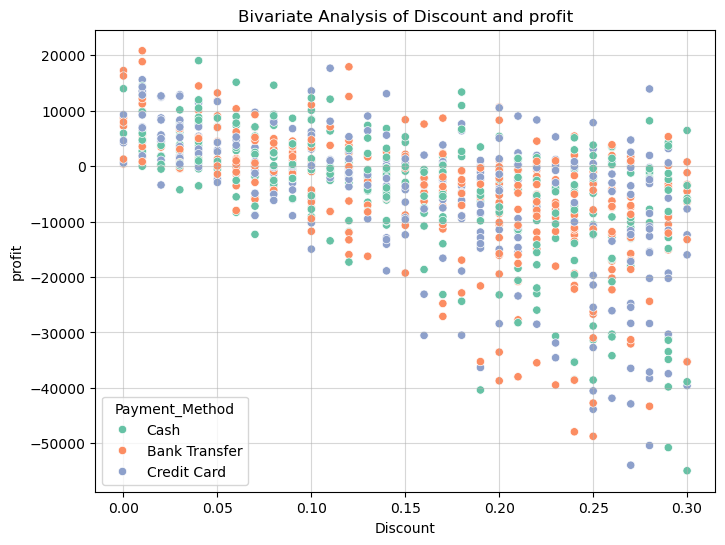

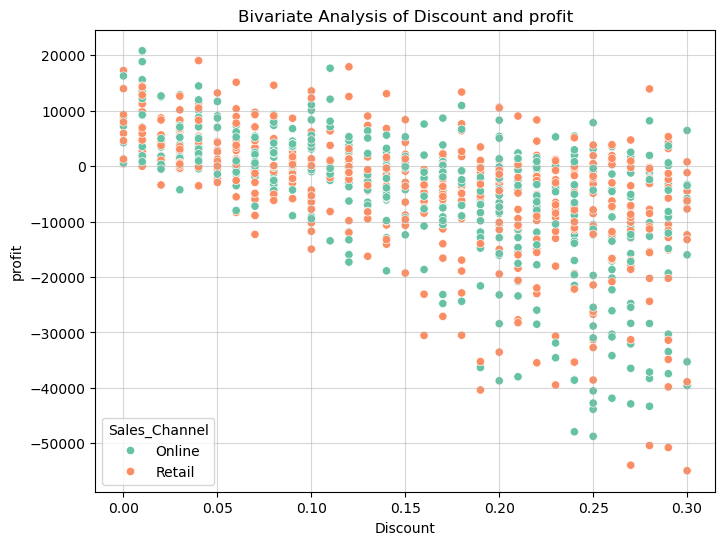

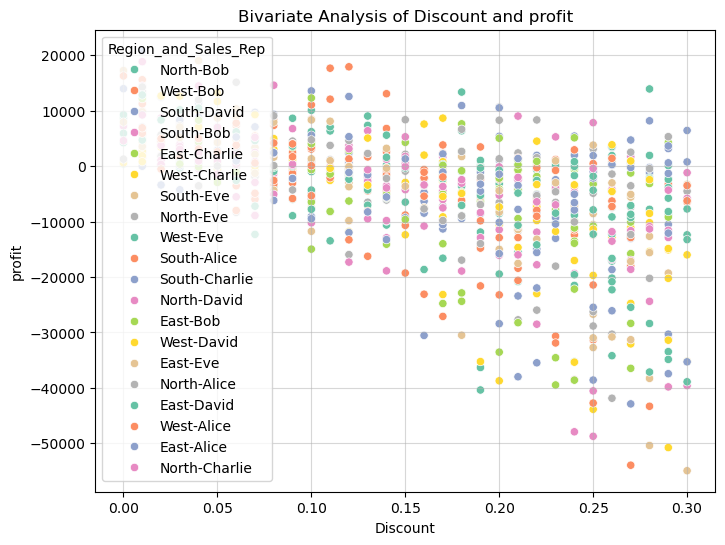

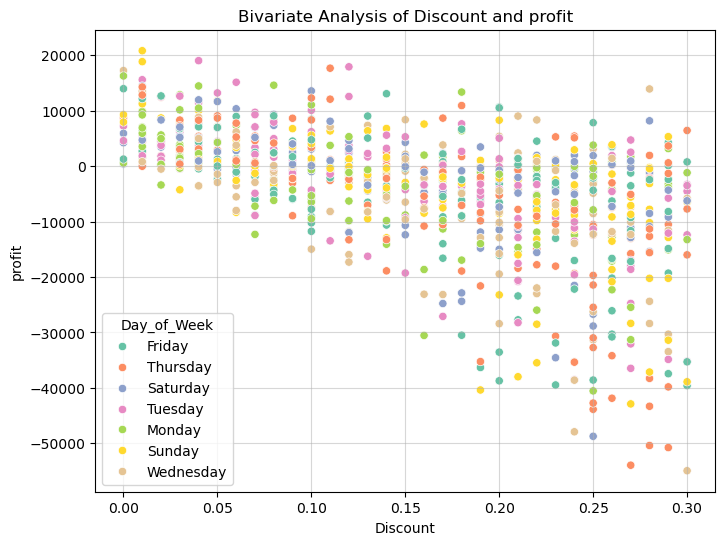

In [417]:
bivariate_analysis(cleaned_data, "Discount", "profit")

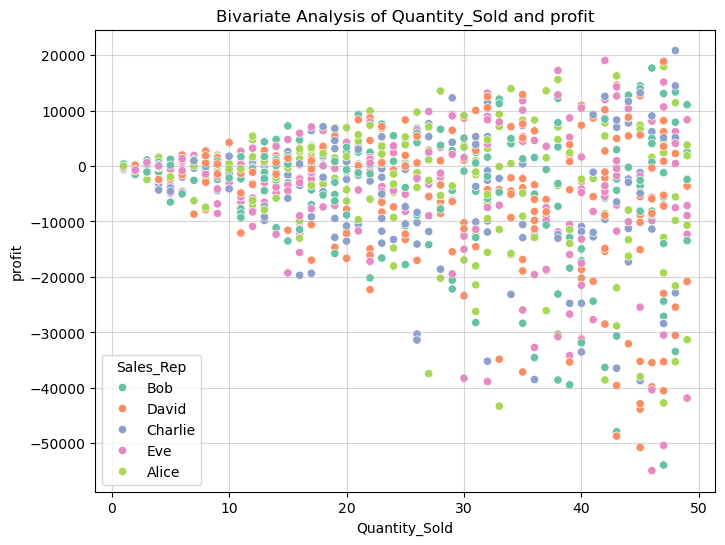

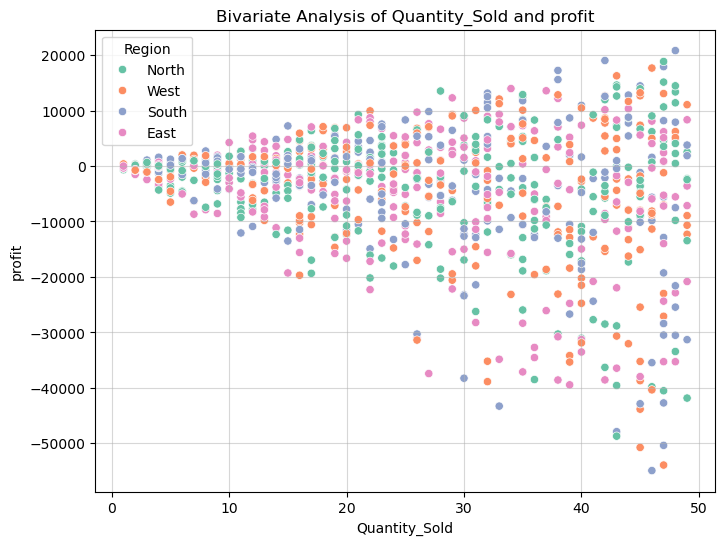

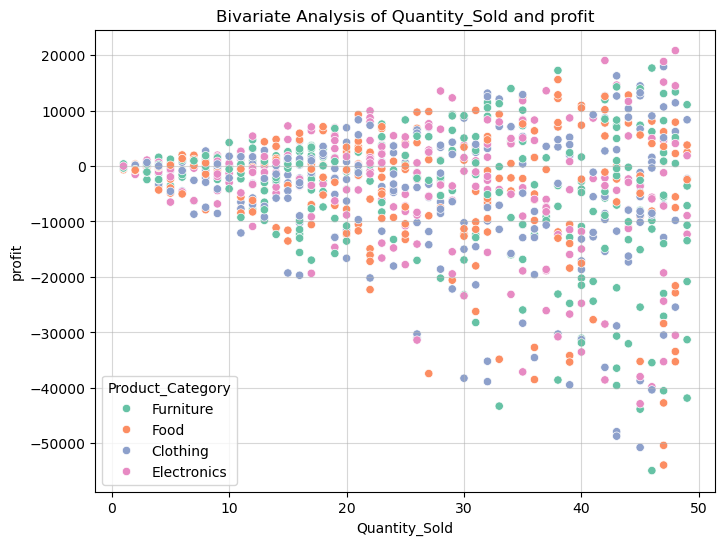

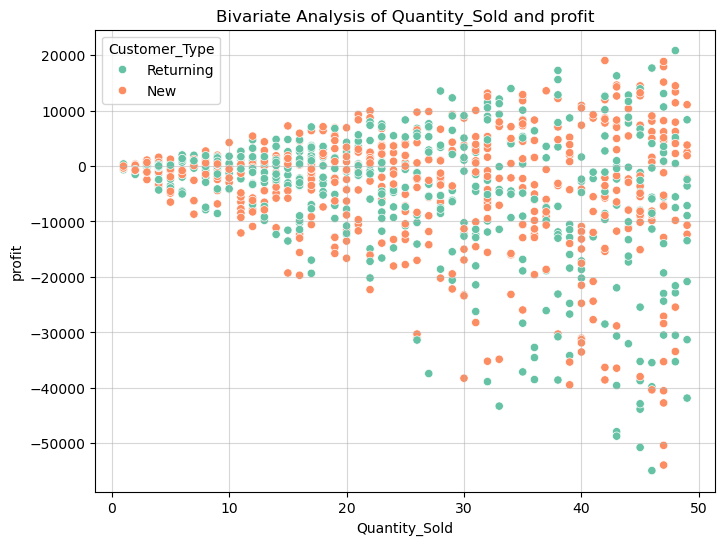

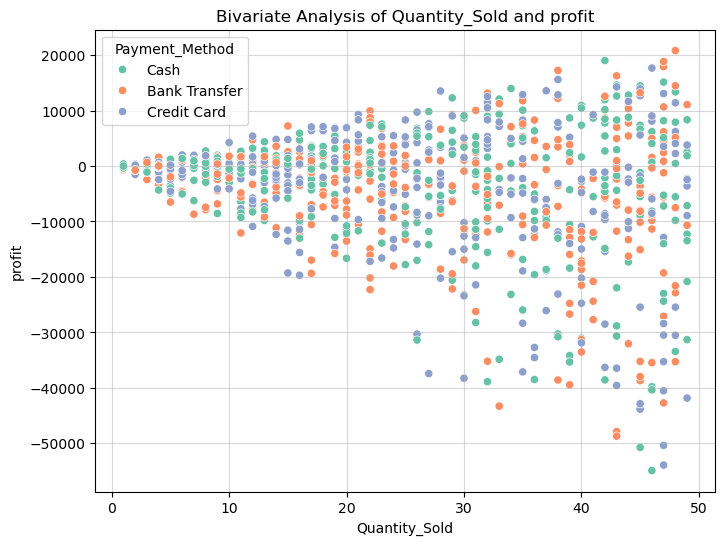

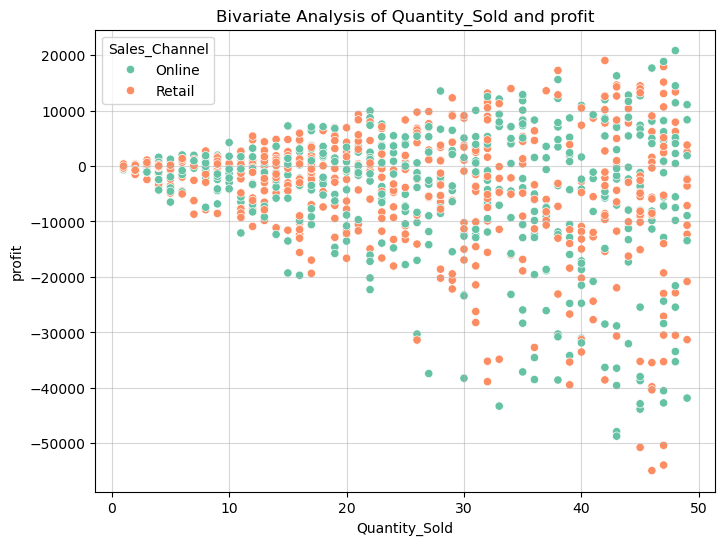

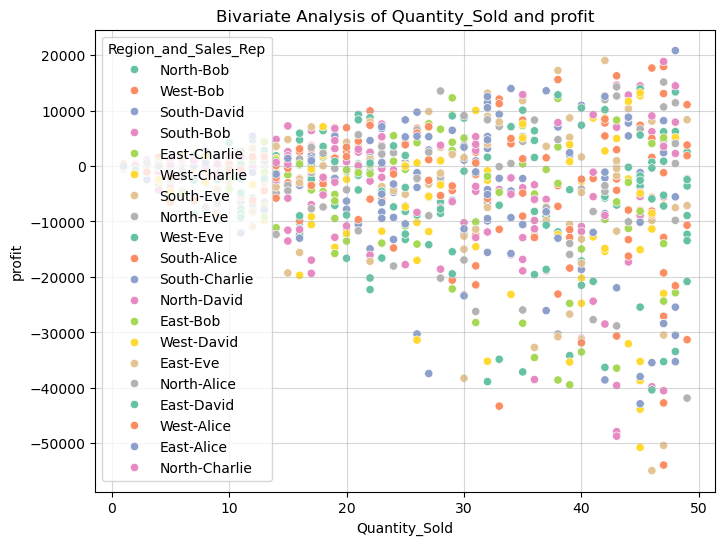

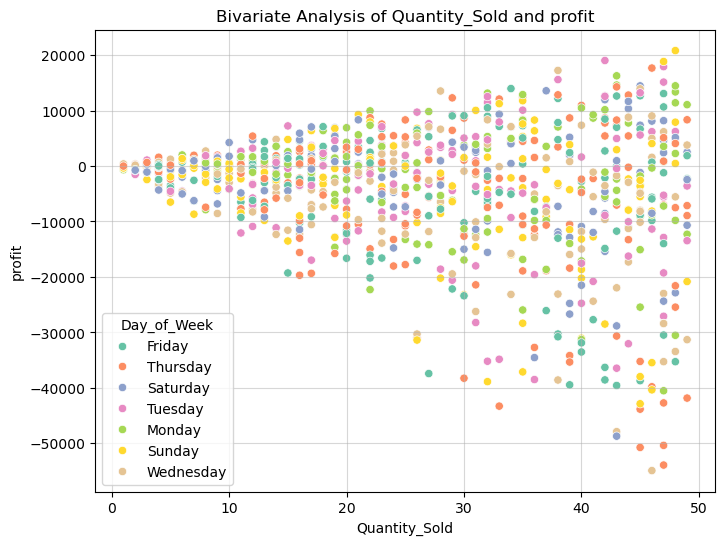

In [418]:
bivariate_analysis(cleaned_data, "Quantity_Sold", "profit")

### Violin Plot Analysis (Relevant Numerical Values for each Relevant Categorical Value)

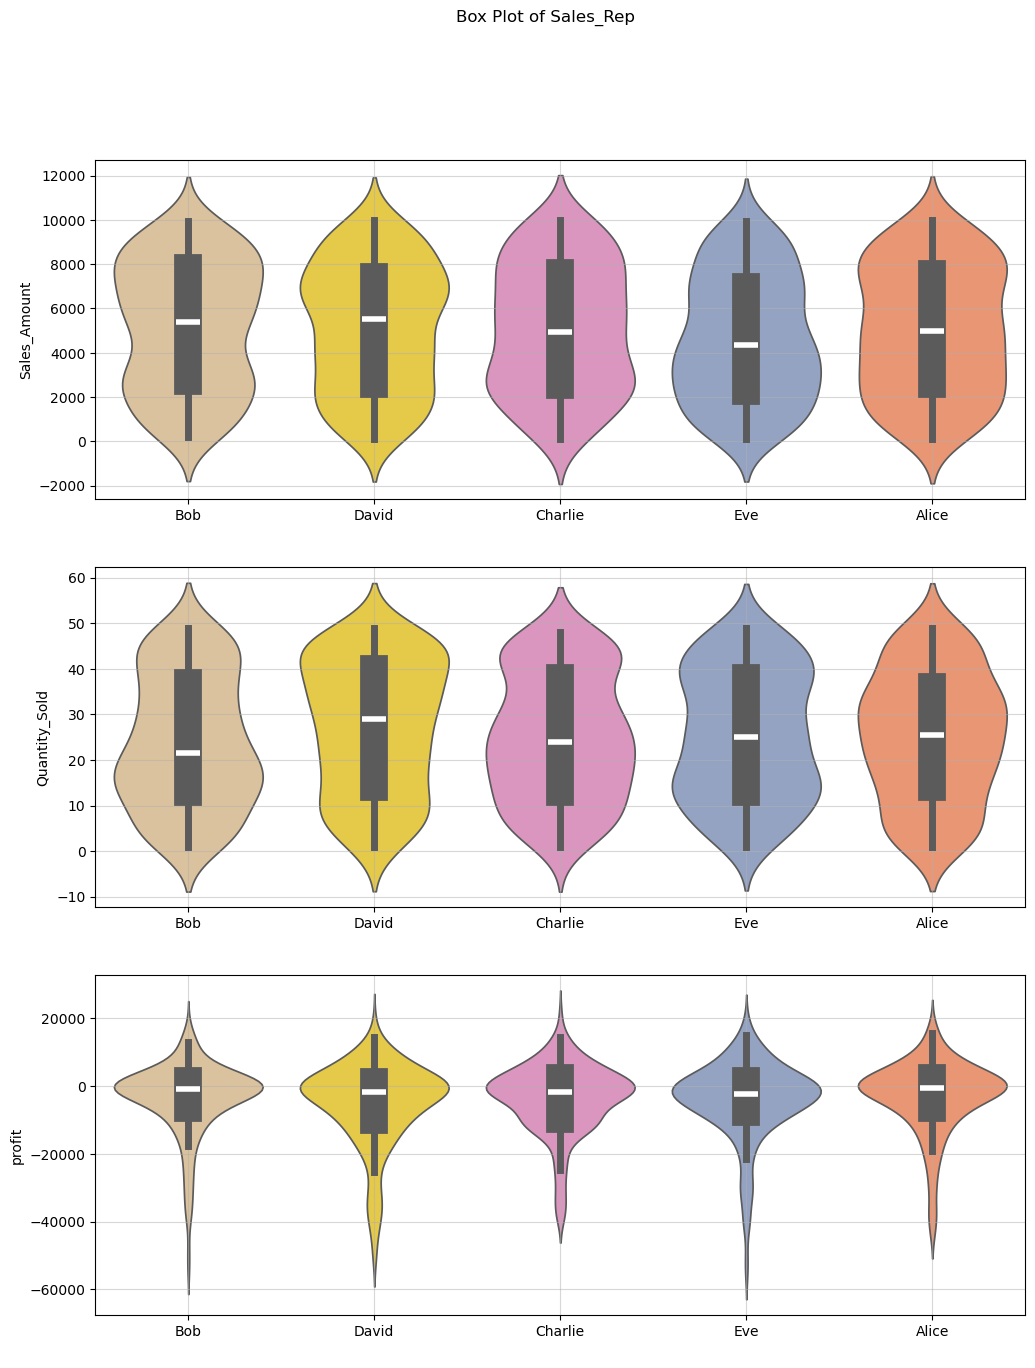

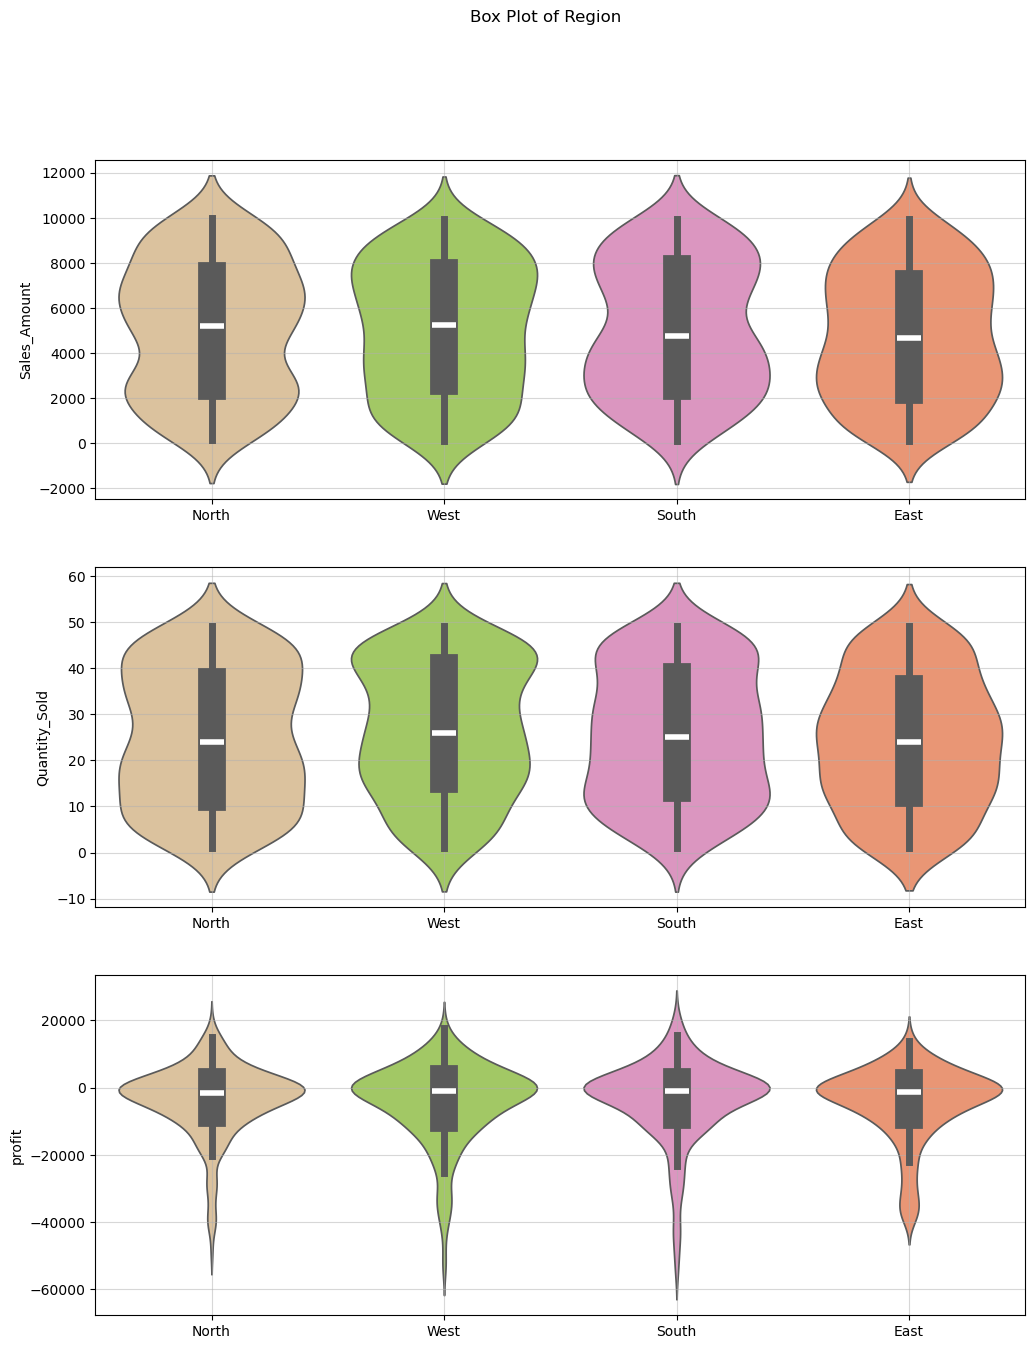

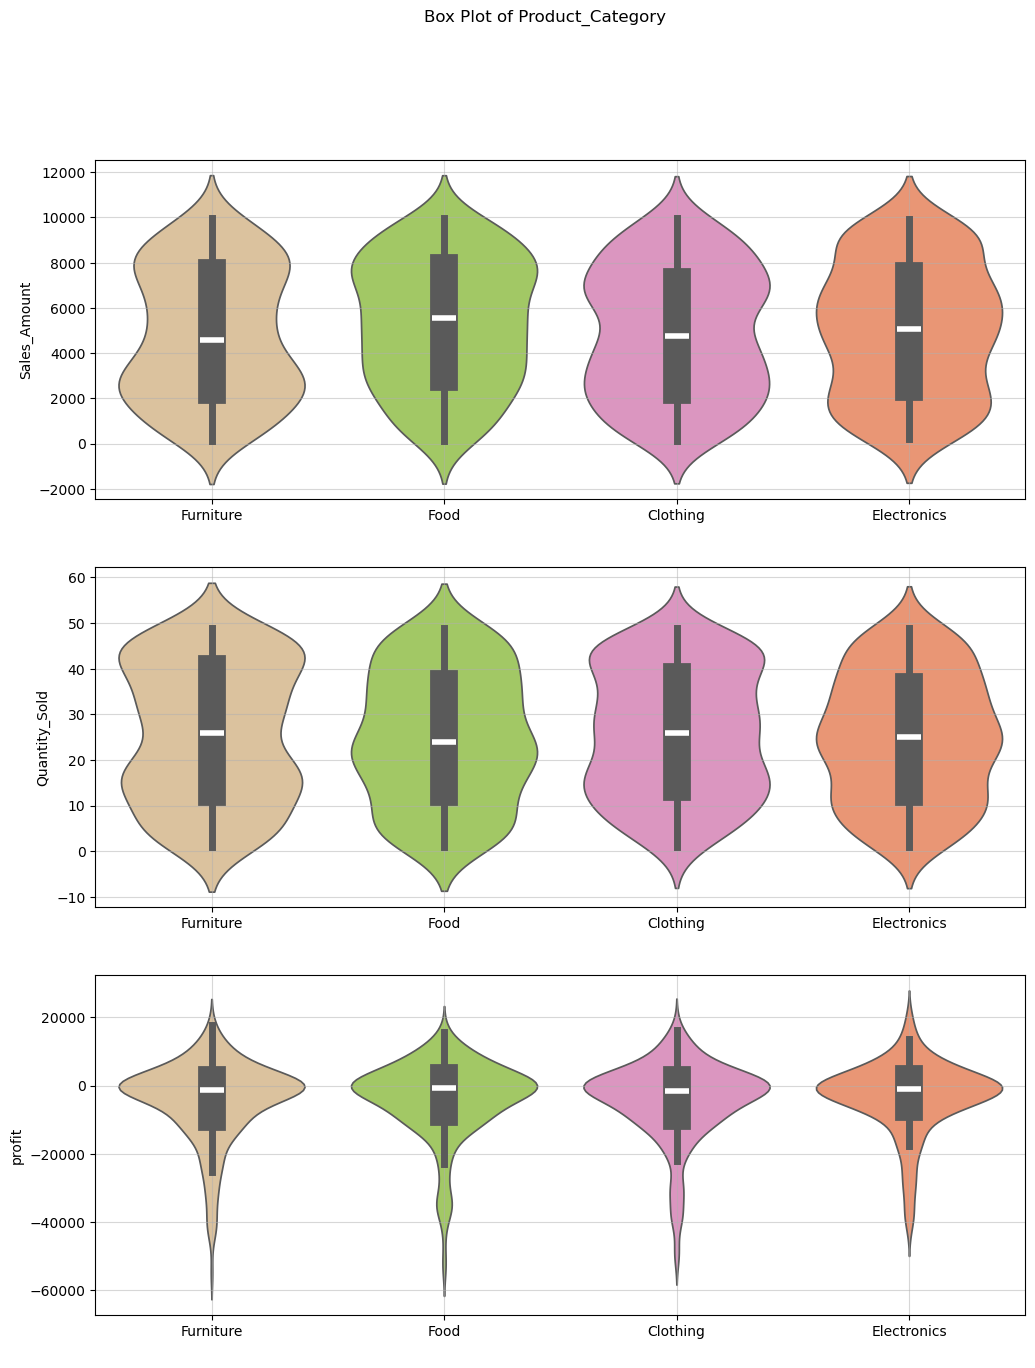

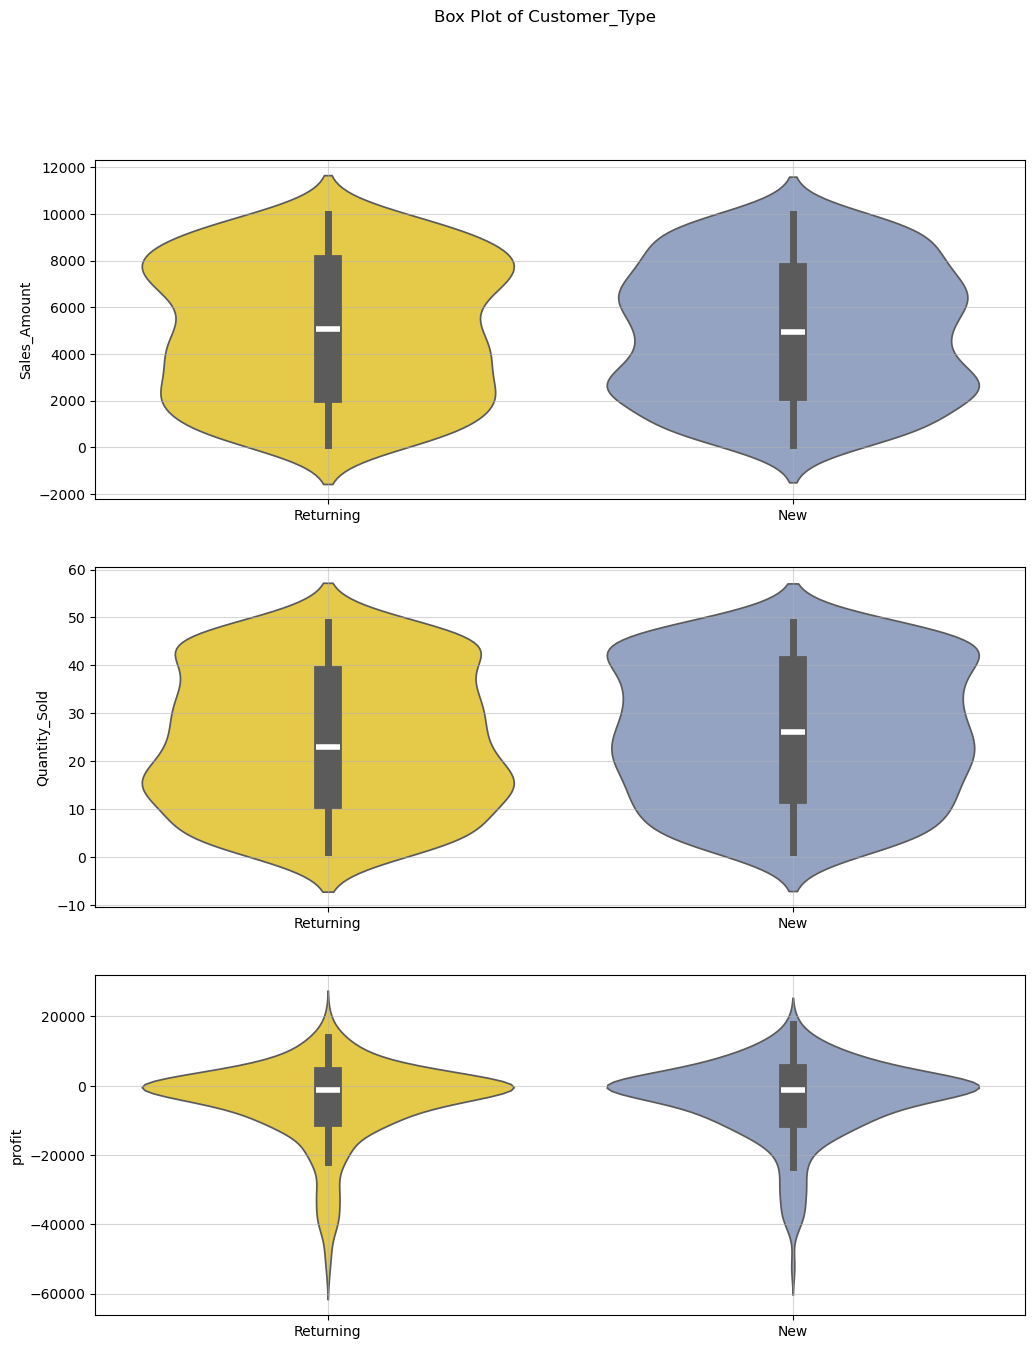

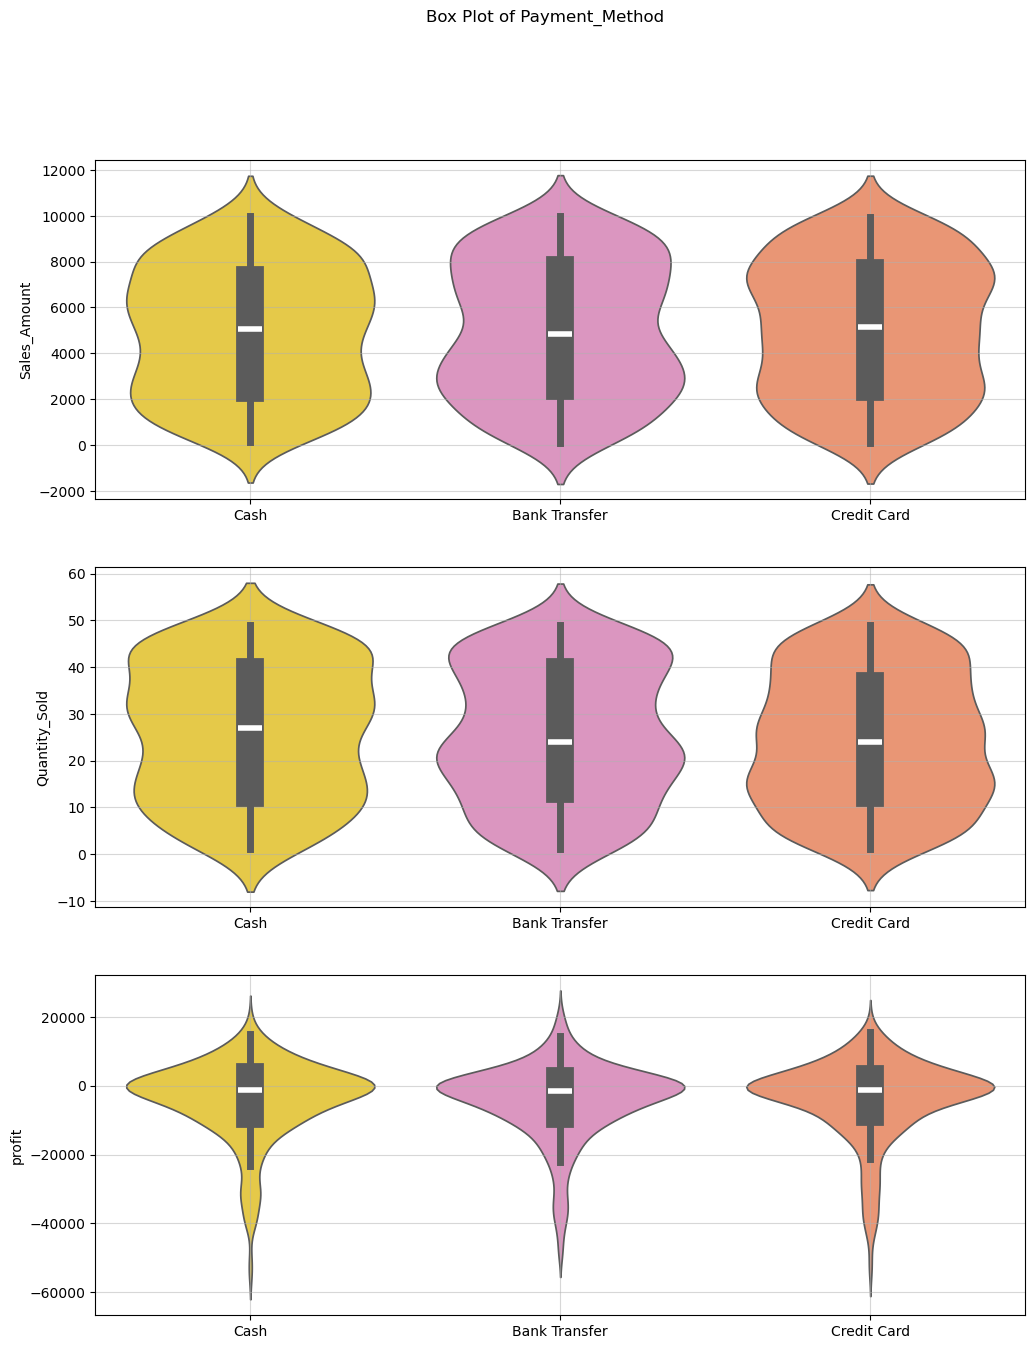

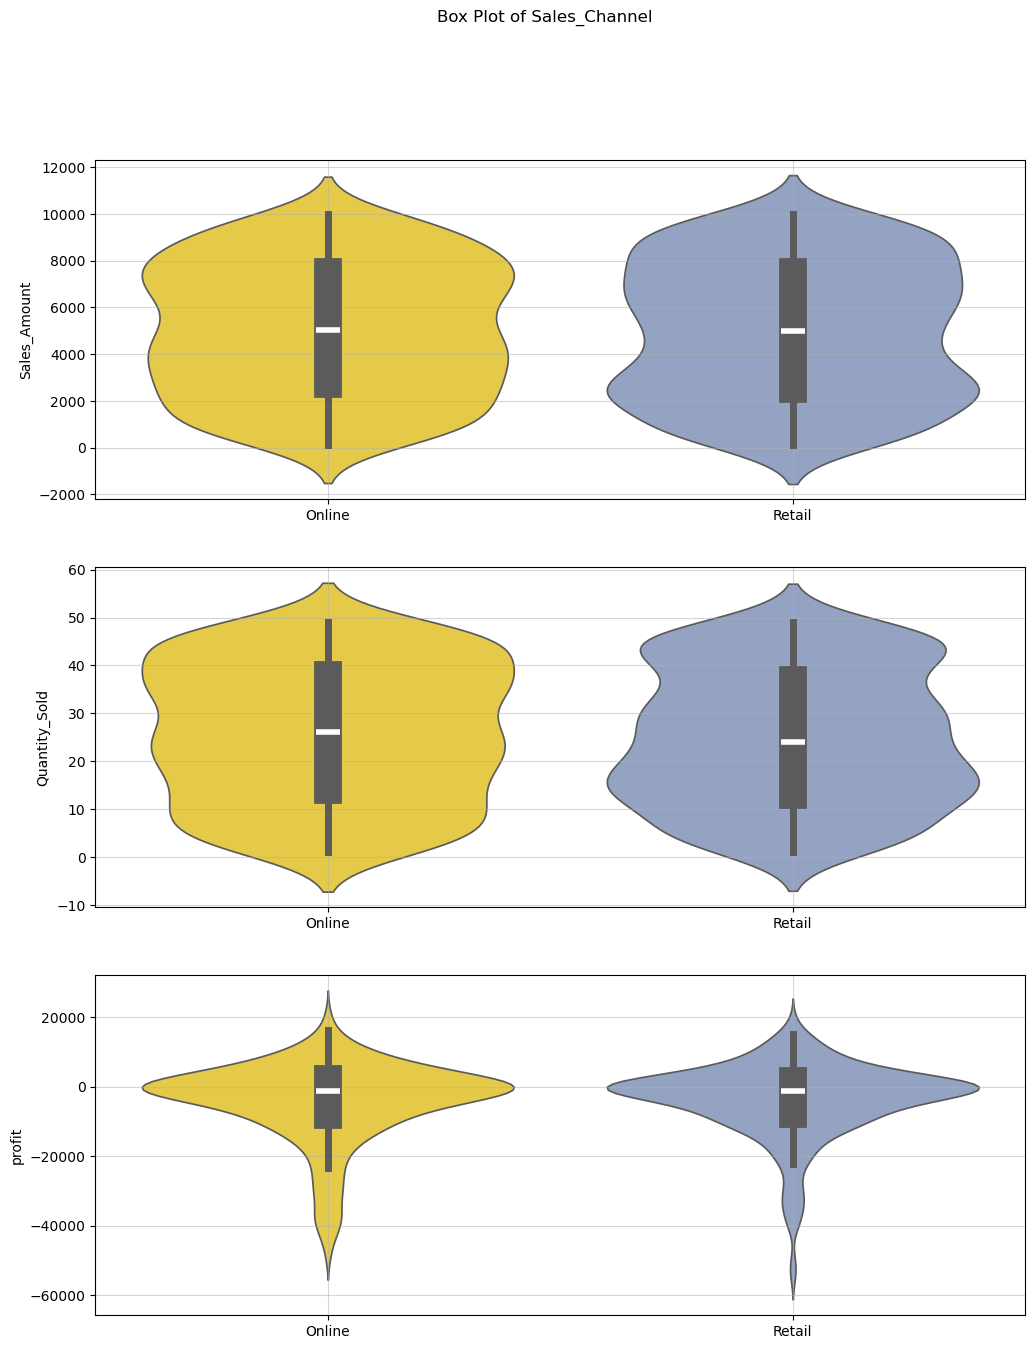

In [419]:
violin_plot_analysis(cleaned_data)

#### Sales Amount by Month

In [420]:
most_sales_month = (grouping_column(cleaned_data, "Month", "Sales_Amount")
                    .sort_values(by="Month", ascending=True))
most_sales_month

Month  Total_Sales_Amount  Average_Sales_Amount  Count_Sales_Amount
0       1           495420.37           4809.906505                 103
1       2           368919.36           4918.924800                  75
2       3           402638.77           5032.984625                  80
3       4           438992.61           5419.661852                  81
4       5           389078.76           5403.871667                  72
5       6           418458.34           4548.460217                  92
6       7           374242.88           5503.571765                  68
7       8           443171.28           4765.282581                  93
8       9           367837.60           5409.376471                  68
9      10           460378.78           5231.577045                  88
10     11           467482.90           4920.872632                  95
11     12           392643.58           4619.336235                  85

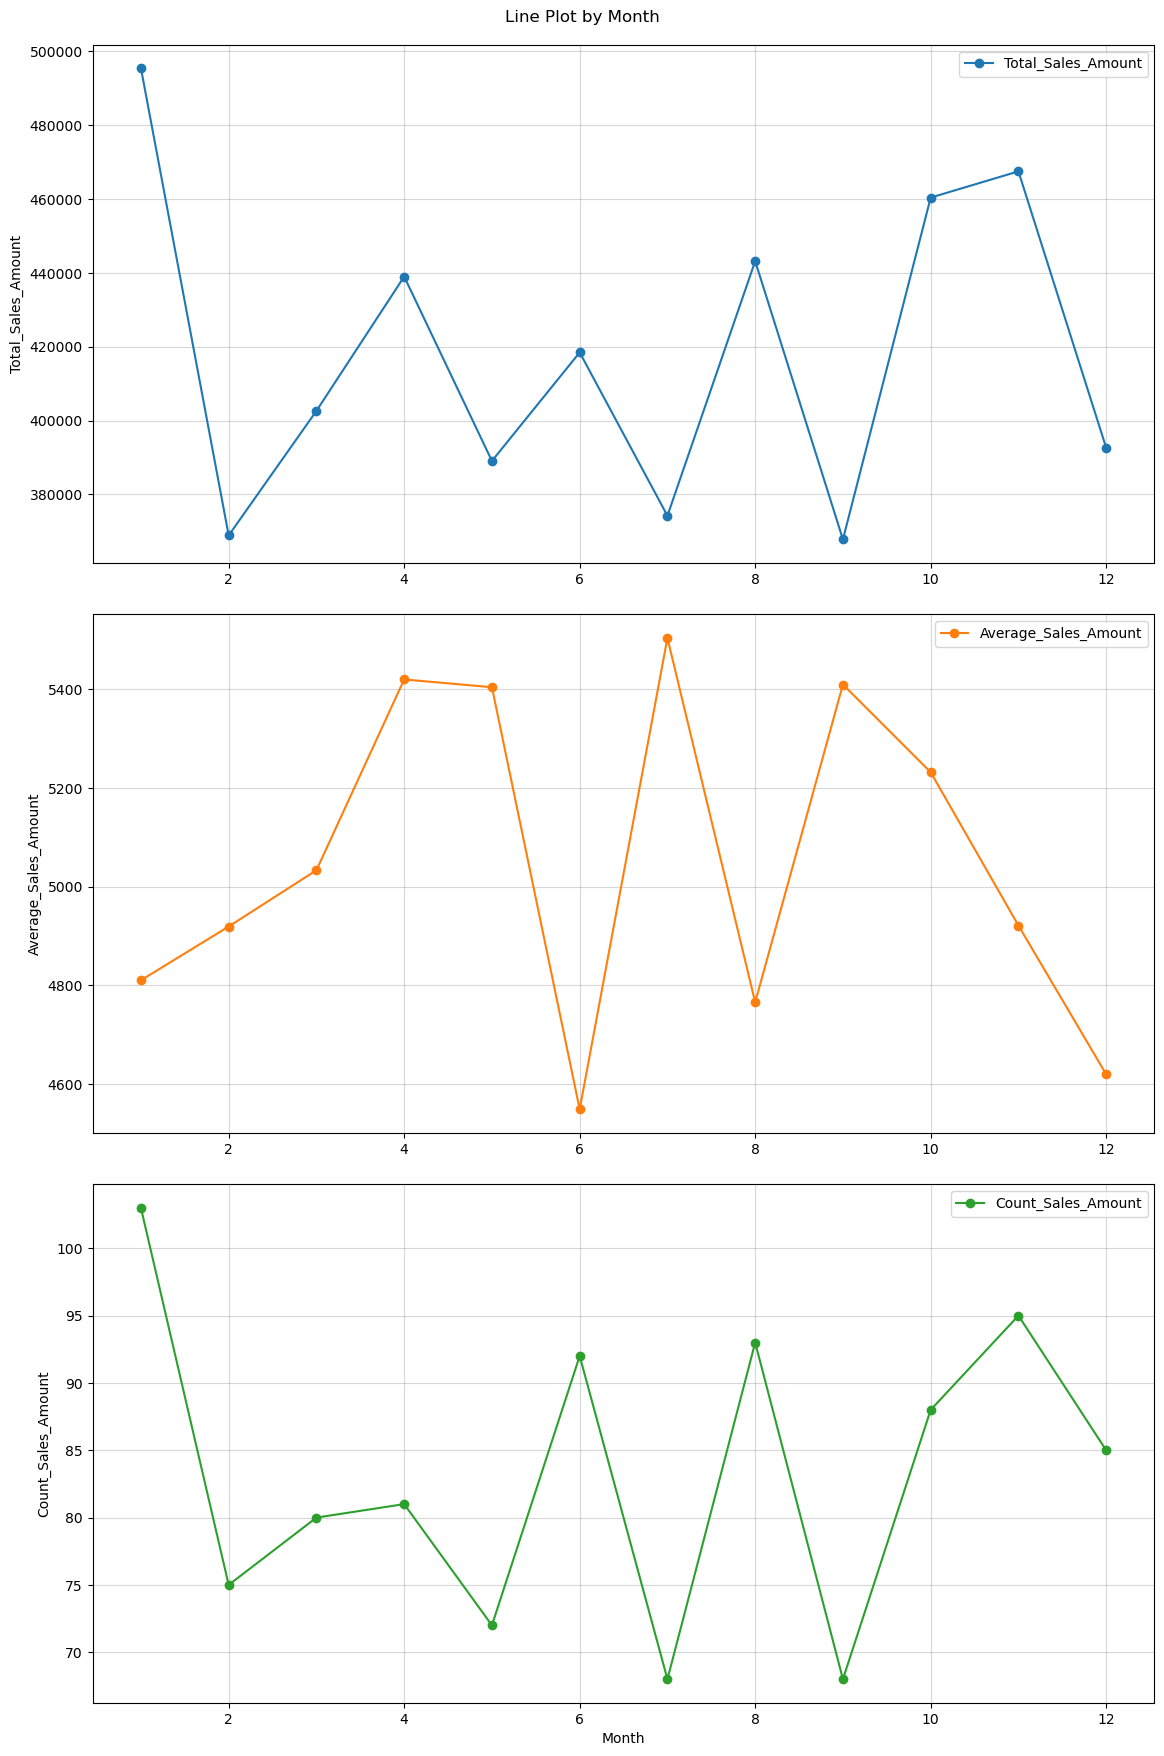

In [457]:
plot_visual(most_sales_month, "Month", ["Total_Sales_Amount", "Average_Sales_Amount", "Count_Sales_Amount"])

#### Sales Amount by Day of the Week

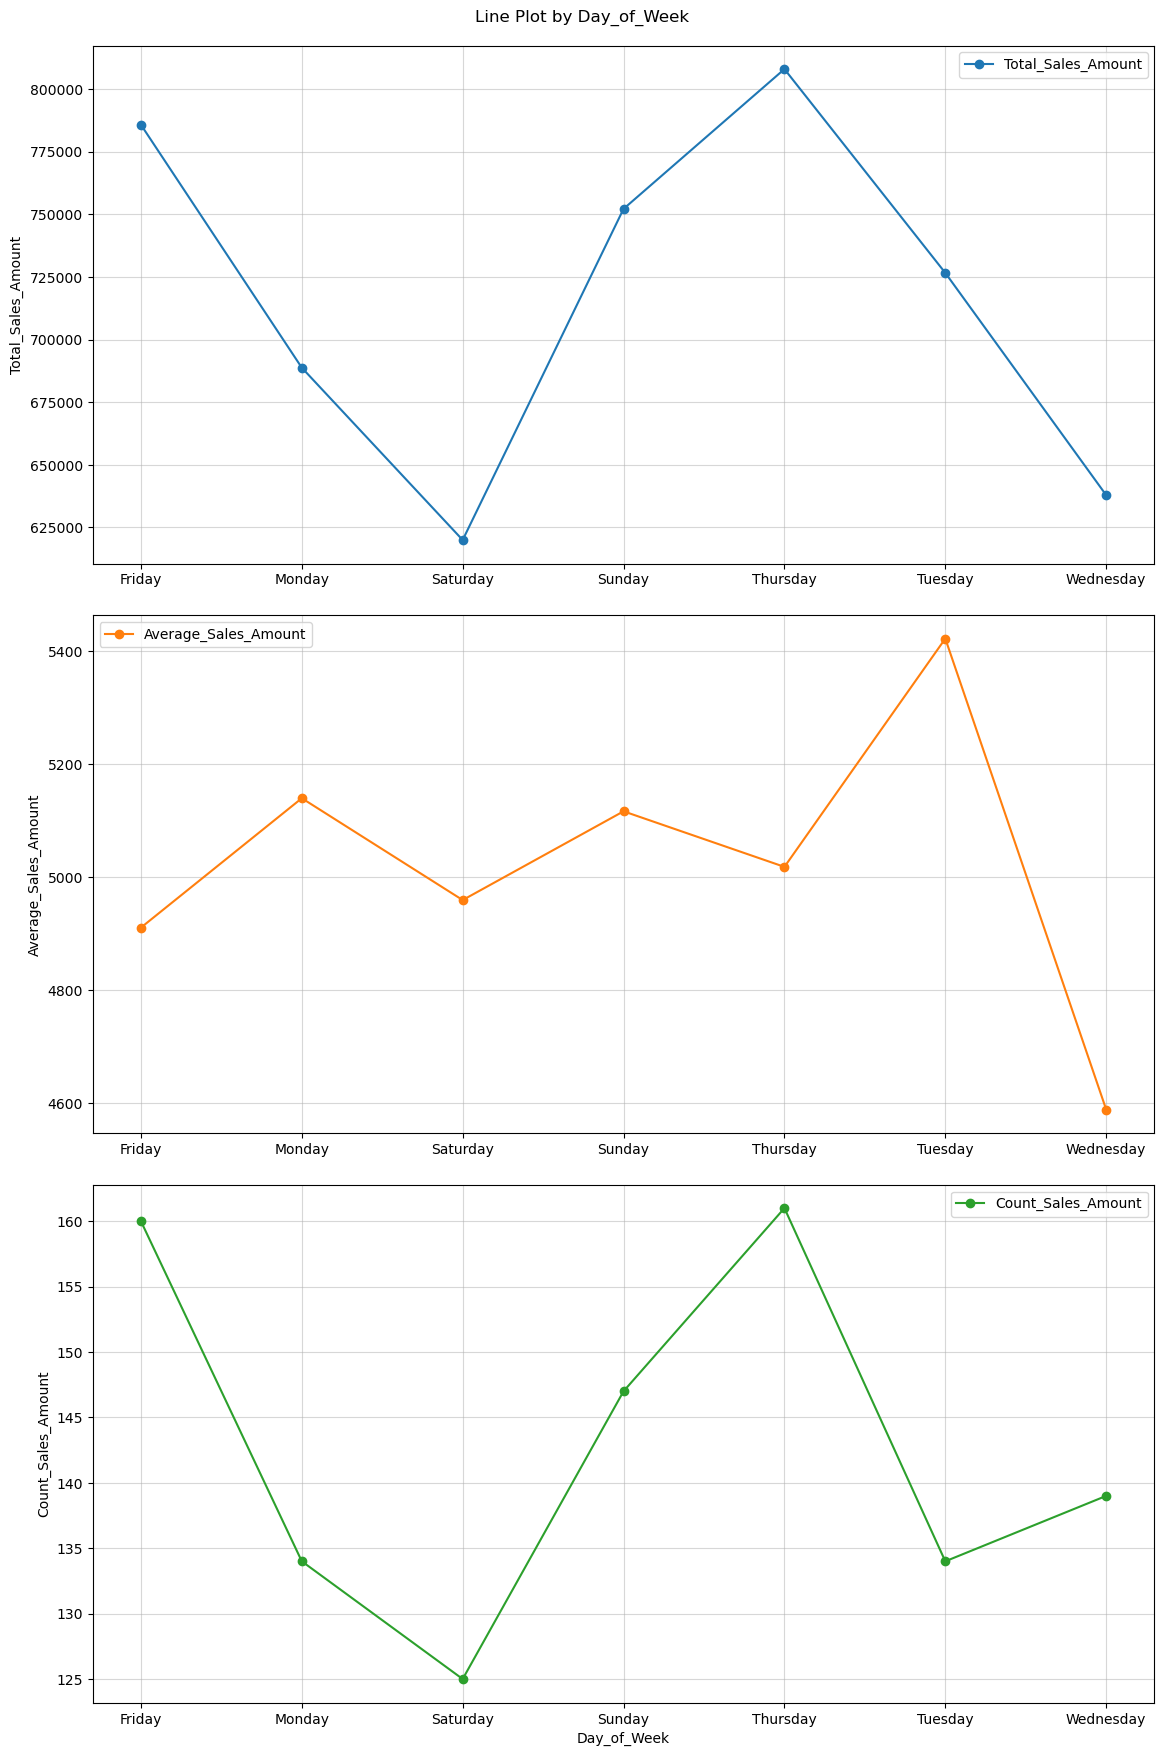

In [458]:
most_sales_day_of_week = (grouping_column(cleaned_data, "Day_of_Week", "Sales_Amount")
                    .sort_values(by="Day_of_Week", ascending=True))

plot_visual(most_sales_day_of_week, "Day_of_Week", ["Total_Sales_Amount", "Average_Sales_Amount", "Count_Sales_Amount"])

#### Quantity Sold by Month

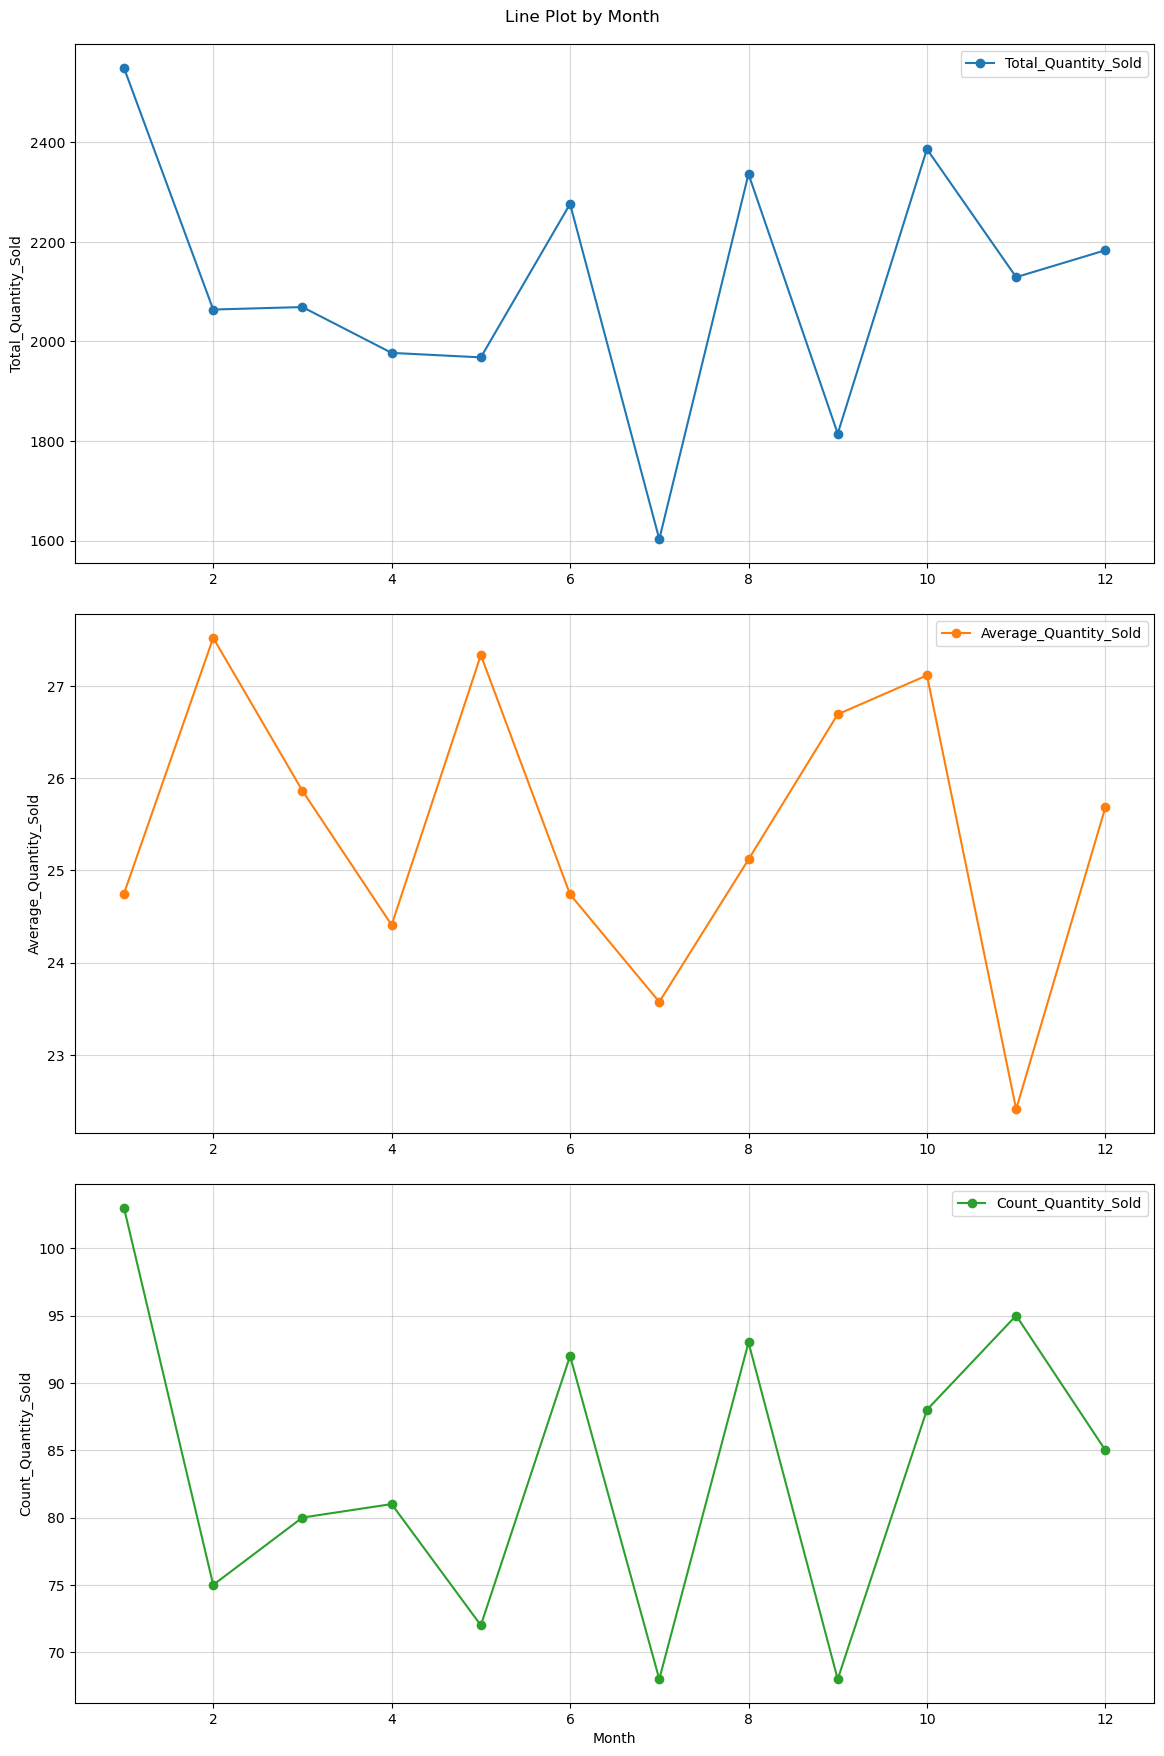

In [459]:
most_sales_day_of_week = (grouping_column(cleaned_data, "Month", "Quantity_Sold")
                    .sort_values(by="Month", ascending=True))

plot_visual(most_sales_day_of_week, "Month", ["Total_Quantity_Sold", "Average_Quantity_Sold", "Count_Quantity_Sold"])

#### Quantity Sold by Day of Week

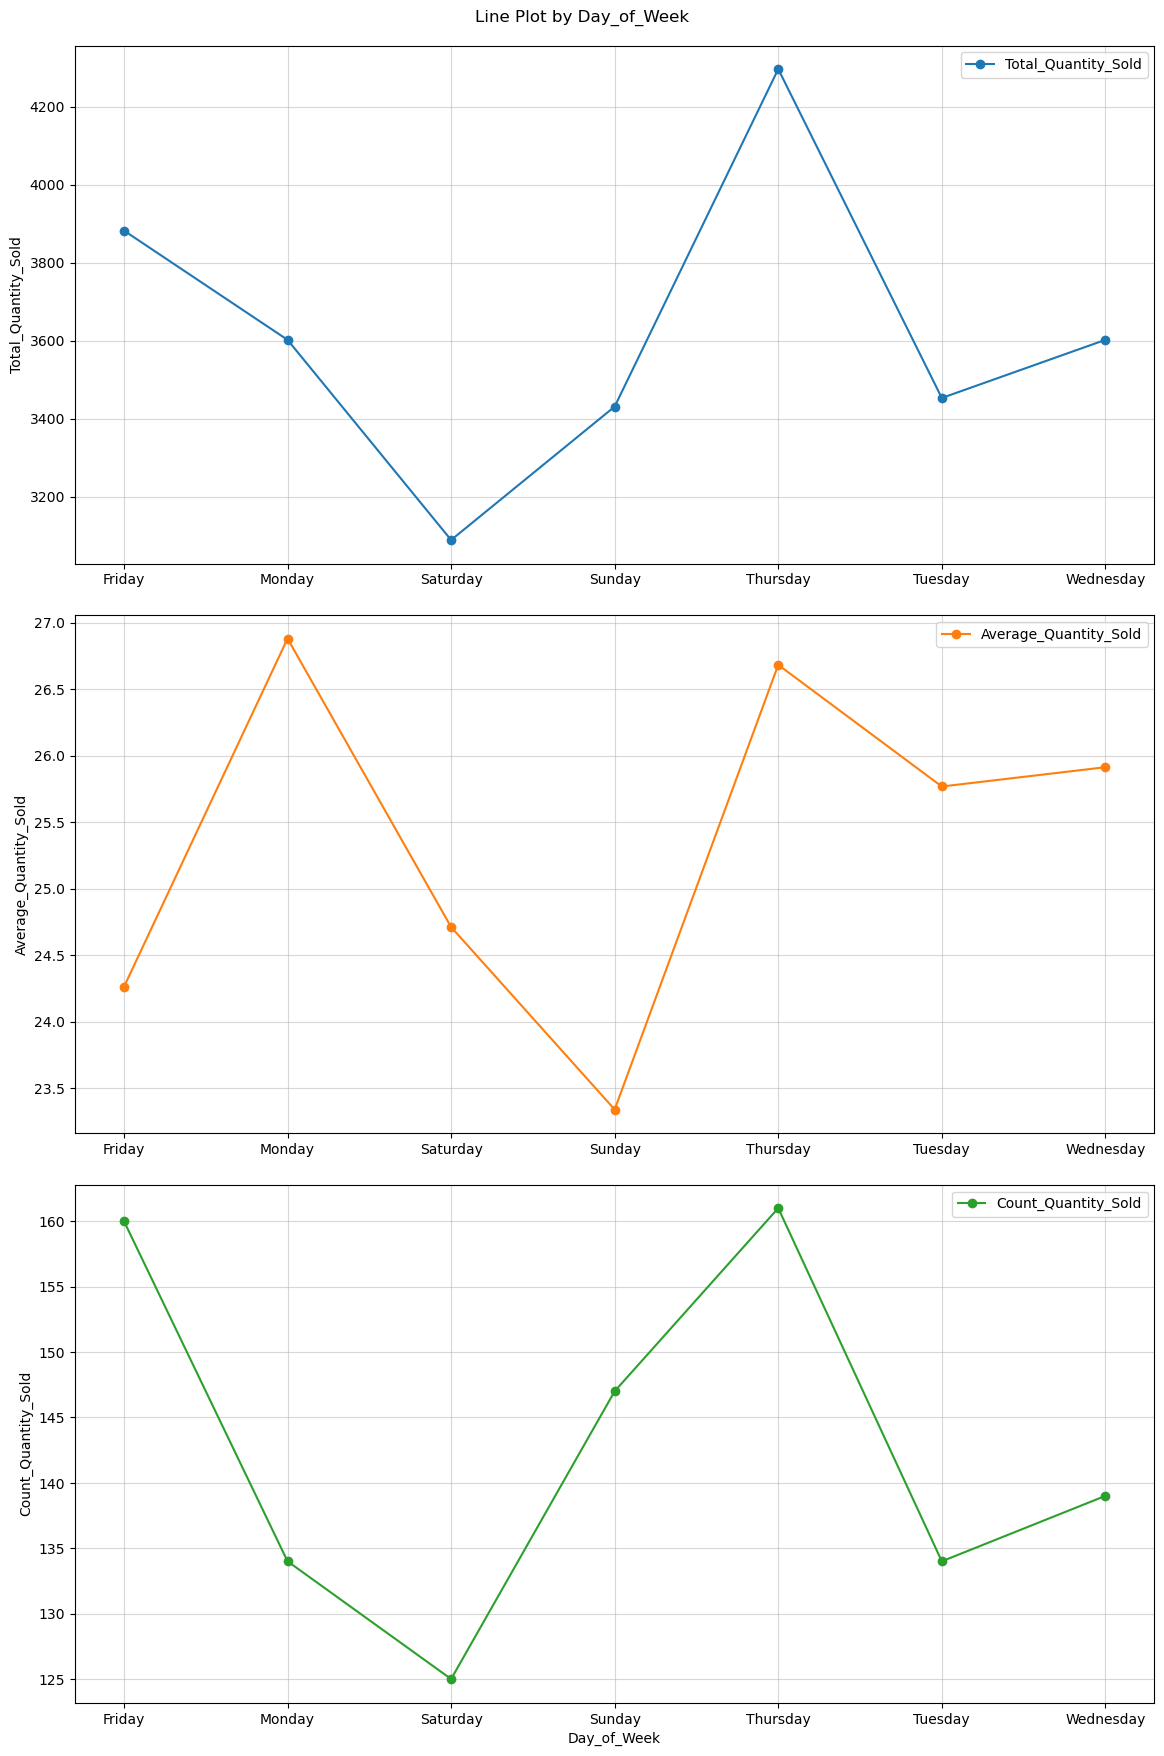

In [460]:
most_sales_day_of_week = (grouping_column(cleaned_data, "Day_of_Week", "Quantity_Sold")
                    .sort_values(by="Day_of_Week", ascending=True))

plot_visual(most_sales_day_of_week, "Day_of_Week", ["Total_Quantity_Sold", "Average_Quantity_Sold", "Count_Quantity_Sold"])

#### Sale Rep Region Reports

In [505]:
rep_quant = rep_piv_table(cleaned_data, selected_column=["Sales_Rep"], by_column=["Quantity_Sold", "Sales_Amount"])
rep_quant

Sales_Rep           Type         sum
0     Alice  Quantity_Sold     4832.00
1     Alice   Sales_Amount   965541.77
2       Bob  Quantity_Sold     4977.00
3       Bob   Sales_Amount  1080990.63
4   Charlie  Quantity_Sold     4217.00
5   Charlie   Sales_Amount   860811.48
6     David  Quantity_Sold     6042.00
7     David   Sales_Amount  1141737.36
8       Eve  Quantity_Sold     5287.00
9       Eve   Sales_Amount   970183.99

#### Sum from 2023-2024 Sale Reps Reports

In [510]:
most_quantity_sold = rep_quant[rep_quant["Type"] == "Quantity_Sold"].sort_values(by="sum", ascending=False)
most_quantity_sold

Sales_Rep           Type     sum
6     David  Quantity_Sold  6042.0
8       Eve  Quantity_Sold  5287.0
2       Bob  Quantity_Sold  4977.0
0     Alice  Quantity_Sold  4832.0
4   Charlie  Quantity_Sold  4217.0

In [512]:
total_sales_amount = rep_quant[rep_quant["Type"] == "Sales_Amount"].sort_values(by="sum", ascending=False)
total_sales_amount

Sales_Rep          Type         sum
7     David  Sales_Amount  1141737.36
3       Bob  Sales_Amount  1080990.63
9       Eve  Sales_Amount   970183.99
1     Alice  Sales_Amount   965541.77
5   Charlie  Sales_Amount   860811.48